# Introduction

## Final Project Submission

Please fill out:
* Student name: Morgan Jones
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


## Initial Discovery
This is the first project of the Flatiron Data Science Cohort. Microsoft is interested in creating a new movie studio, and have hired me to *help them better understand the movie industry*. The key question Microsoft wants answered through data analysis is: 
What **type** of **films** are currently doing the **best** at the **box office**
Upon answering this question, they would like me to translate these findings into **actionable insights** for the studio to use when deciding what films they would like to make.

Words that are in bold will be the main focus throughout this project. Here we will focus on films, specifically:

- Type: There are several categories which can be explored, for example the genre, runtime, release date, rating, budget,release location, etc.
- Best: For general purposes, we will consider best performance at the box office as those movies that return the highest gross at the box office.
- Actionable Insights: Upon exploration, the analysis will yield a plan of action, incorporating the insights gained from the data.

## Methodology

This project will take an in-depth look into data describing the film industry and its current trends. The process to make this exploration will be:

   - Import libraries
   - Gather initial dataframes / Read in dataframes
   - Clean Data
   - Gather basic information about dataframes
   - Ask Question 1
   - EDA1: Make visualizations and find valuable correlations
   - Ask Question 2 
   - EDA2 Make visualizations and find valuable correlations
   - Ask Question 3 
   - EDA3 Make visualizations and find valuable correlations
   - Conclude findings, offer actionable insights

## Importing Libraries

The beginning of the project involves importing the libraries used throughout the project that do all the heavy lifting, among the first we will import are:

    - Pandas: a data analysis library we will use for its data structures and operations for manipulating numerical tables.
    - Numpy: an essential library for scientific computing in python
    - Glob: for generating lists of files, and will prove useful when reading in our dataframes.
    - Matplotlib: a plotting library useful for making the graphs and visualizations we need.
    - Seaborn: a data visualization library based on matplotlib to make graphs more visually appealing.

In [147]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import seaborn as sns  # Alias seaborn to be referred to as sns
from glob import glob
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

These will be the initial libraries we import, with more to come as we go along.

## Reading in DataFrames

In order to help Microsoft *better understand the film industry* we will need data. Here we will read in a collection of dataframes that describe the current state of the film industry to glean actionable insights.

In [3]:
# We can access a dataset we have collected using pandas, and view the first 25 rows
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budget.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


Here we can see the production budget as well as domestic and worldwide gross of 25 films with the highest production budget. This is very helpful information, however because we have several datasets, let's use another method to read them in at once. For this we can use glob.

In [4]:
# Let's use glob to create a list of the datasets we have, to bypass reading in each dataset individually.
csv_files = glob('./zippedData/*.csv.gz')
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [5]:
# Now we have a list of 9 datasets with information describing the film industry, lets confirm that it is indeed a list.
type(csv_files)

list

In [6]:
# To make handling the datasets easier, we should convert this list into a dictinary, where each key is a seperate file.
# First we will make an empty dictionary
d = {}

# Now lets make a for loop that iterates through our csv_files list, taking each file and inserting it into the dictionary
for file in csv_files:
    d[file] = pd.read_csv(file)

In [7]:
# Let's take a look athe the keys and values of our new dictionary
print(d.keys())
print(d.values())

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])
dict_values([                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                   

In [8]:
# As we can see, our dictionary now has the dataset titles and their values.
# However, we can clean up the file names with dictinary and for loop.

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(
        filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

Now we should have very clean and concise names for our datasets, let's take a look.

In [9]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

Great, we now have a collection of datasets we can use to start answering our question. Before we can harness their value, they first need to be cleaned. Let's begin by taking a look at their structure, what columns they contain, and if there are any missing or duplicated values. If there are, we will need to remove or augment them before moving forward.

## Cleaning data

To begin cleaning our data, we first need to take a look at each dataset individually to get an understanding of what kind of attention it will need. Let's take a look at our first dataset.

In [10]:
# We can get a glipse of what the dataset looks like using the head method
csv_files_dict['bom_movie_gross_gz'].head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [11]:
# The info method will return the column names and value counts for each column in the dataset.
csv_files_dict['bom_movie_gross_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [12]:
# The shape attribute will tell us the complete 'size' of the dataset.
csv_files_dict['bom_movie_gross_gz'].shape

(3387, 4)

We can see the 'bom_movie_gross_gz' dataset has lots of missing values, to confirm we can use the isnull method chained with the values attribute and any method.

In [13]:
csv_files_dict['bom_movie_gross_gz'].isnull().values.any()

True

In [14]:
# We will need to get the exact count and percentage of missing values to assess how to resolve the issue of their absence.
csv_files_dict['bom_movie_gross_gz'].isnull().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
# While the year column contains all of it's value points, studio, domestic_gross, and foreign_gross
# are missing values. To get a better idea of what steps should be taken, lets get the percent of
# missing values with repect to the total.

miss_studio = (csv_files_dict['bom_movie_gross_gz']['studio'].isnull().sum()
               / len(csv_files_dict['bom_movie_gross_gz'])) * 100
print("The percentage of missing studio values is {}%.".format(round(miss_studio, 2)))

The percentage of missing studio values is 0.15%.


Only about a tenth of a percent of values are missing from the studio column. With such a small amount, we can remove these rows without missing much data. To remove these points, we can make use of the dropna method. We will keep in mind that df.dropna() by default returns a new dataset without NaN values. So, we have to assign it to a variable.

In [16]:
csv_files_dict['bom_movie_gross_gz'] = csv_files_dict['bom_movie_gross_gz'].dropna(subset=[
                                                                                   'studio'])

When dropping rows from a dataset, it's best practice to check that the method worked smoothly and there are no remaining na values in the specified column. Let's check for this now.

In [17]:
csv_files_dict['bom_movie_gross_gz'].isnull().sum()

studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

Notice that in deleting some of the missing rows in the studio column, we have also deleted some rows in the other columns. We can now correct the missing values for the other gross columns. However, it would appear that we will need to find the percentage of missing values for potentially several columns in other datasets. Let's make a function that we can call in the future to make this process quicker.

In [18]:
def miss_per(column, df):
    """ returns the percentage of missing values from a colum in a dataframe """
    percentage_missing = (column.isnull().sum() / len(df)) * 100

    return percentage_missing

In [19]:
# Now let's test our new function to calculate the percentage of missing values in the domestic gross column.
miss_dom = miss_per(csv_files_dict['bom_movie_gross_gz']
                    ['domestic_gross'], csv_files_dict['bom_movie_gross_gz'])
print("The percentage of missing domestic gross values is {}%.".format(
    round(miss_dom, 2)))

The percentage of missing domestic gross values is 0.77%.


Here we are missing about 3/4th of a percent of the domestic gross values. We can remove these rows as well considering there are so few of them.

In [20]:
csv_files_dict['bom_movie_gross_gz'] = csv_files_dict['bom_movie_gross_gz'].dropna(
    subset=['domestic_gross'])

In [21]:
# Let's check to make sure that the changes have occurred.
csv_files_dict['bom_movie_gross_gz'].isnull().sum()

studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

Lastly we have the foreign_gross missing values, there seem to be more of these. Let's get the exact percentage.

In [22]:
miss_for = miss_per(csv_files_dict['bom_movie_gross_gz']
                    ['foreign_gross'], csv_files_dict['bom_movie_gross_gz'])
print("The percentage of missing foreign gross values is {}%.".format(
    round(miss_for, 2)))

The percentage of missing foreign gross values is 40.2%.


Missing 40% of data points is no laughing matter. We have to decide between deleting the entire column or filling in the missing values with another value. Because there are so many values missing, we will drop this column, and perhaps gain information on foreign/international gross earnings via another data source.

In [23]:
csv_files_dict['bom_movie_gross_gz'] = csv_files_dict['bom_movie_gross_gz'].drop(
    'foreign_gross', 1)

In [24]:
# Check that the foreign gross column has been dropped.
csv_files_dict['bom_movie_gross_gz'].isnull().sum()

studio            0
domestic_gross    0
year              0
dtype: int64

We no longer have any missing values in this dataset, now let's make sure there are no duplicate values in the dataset using the duplicated method.

In [25]:
csv_files_dict['bom_movie_gross_gz'].duplicated().values.any()

True

In [26]:
# We have duplicated values in our dataset, lets find out how many values with a sum method chain.
csv_files_dict['bom_movie_gross_gz'].duplicated().sum()

30

In [27]:
type(csv_files_dict['bom_movie_gross_gz'])

pandas.core.frame.DataFrame

In [28]:
# We will remove the duplicated values with the drop duplicates method.
csv_files_dict['bom_movie_gross_gz'].drop_duplicates(
    subset="domestic_gross", keep=False, inplace=True)

In [29]:
# Now we check to make sure there are no more duplicate values.
csv_files_dict['bom_movie_gross_gz'].duplicated().values.any()

False

Great, this dataset has been cleaned and we can take a look to see how films have performed in the domestic gross category.

In [30]:
csv_files_dict['bom_movie_gross_gz'].head(25)

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,2010
Iron Man 2,Par.,312400000.0,2010
Tangled,BV,200800000.0,2010
Despicable Me,Uni.,251500000.0,2010
How to Train Your Dragon,P/DW,217600000.0,2010
Clash of the Titans (2010),WB,163200000.0,2010


In [31]:
# It would appear that all of the films in this dataframe have been released in the year 2010,
# this will not be so useful to us if it is the case. Lets check by looking at the unique
# values in the year column.

csv_files_dict['bom_movie_gross_gz']['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [32]:
# Wonderful, we simply need to organize the dataframe by another column, lets use domestic gross.
csv_files_dict['bom_movie_gross_gz'].sort_values(
    by=['domestic_gross'], ascending=False).head(25)

,studio,domestic_gross,year
title,,,
Star Wars: The Force Awakens,BV,936700000.0,2015
Black Panther,BV,700100000.0,2018
Avengers: Infinity War,BV,678800000.0,2018
Jurassic World,Uni.,652300000.0,2015
Marvel's The Avengers,BV,623400000.0,2012
Star Wars: The Last Jedi,BV,620200000.0,2017
Incredibles 2,BV,608600000.0,2018
Rogue One: A Star Wars Story,BV,532200000.0,2016
Beauty and the Beast (2017),BV,504000000.0,2017


Now we have some value, we can see from this dataframe the top 25 grossing films between year 2010 to 2018. Upon initial review, some characteristics that many of these 25 film share are having a story based on a content that has been created years to decades ago, having time to have built a large fanbase. Many of these films belong to a comic book universe, or are a sequel or even part of a trilogy in some cases. In fact 23 of the 25 fit in this column, that is a 0.92 correlation. This could be something to furthur explore.

This could be commmon amongst a particular genre, as it would appear that most of the films in this top 25 are of the Action/Adventure genre.

Lets take a look at the 25 worst performing films by domestic gross to find further support for this claim.

In [33]:
csv_files_dict['bom_movie_gross_gz'].sort_values(
    by=['domestic_gross'], ascending=False).tail(25)

,studio,domestic_gross,year
title,,,
Suntan,Strand,6600.0,2017
Barely Lethal,A24,6100.0,2015
Las Acacias,OutF,6000.0,2012
"2 Autumns, 3 Winters",FM,5800.0,2014
Liar's Autobiography,BSM,5100.0,2012
Tomorrow When the War Began,Free,4900.0,2012
Jenny's Wedding,IFC,4700.0,2015
Anna,VE,4300.0,2014
To Die Like a Man,Strand,4000.0,2011


As these 25 films are not as popular, it took some research to discover whether or not many of these films belong to the previous content group. As hypothesized few of these films do, to be exact 5 of the 25 have a story based on content that had been previously made. Lets see if genre has any relevance to a film's grossing success.

However, before we continue it would be advantageous to clean and prepare more data to answer the question we will pose. Lets take a wider view of all of the datasets to find those that would be useful in answering our question.

In [34]:
# Here a for loop can be used to iterate through each file in the dictionary of dataframes
# to print the title, and columns belonging to each dataframe.
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, Toy Story 3 to The Swan
Data columns (total 3 columns):
studio            1076 non-null object
domestic_gross    1076 non-null float64
year              1076 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.6+ KB
None
================End DF===============
===============New DF===============
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
================End DF===============
===============New DF===============
imdb_title_akas_gz
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entri

Upon comparing the dataframes by their columns, it appears that those from IMDB (International Movie Database) contain a more complete picture of films when put together. Lets clean these dataframes and join them, and use this new dataframe to answer our first question. Specifically, lets use those focused on the film itself and not the crew, these seem to be imdb.title.ratings, and imdb.title.basics.

However, these two dataframes do not contain any data related to budget, or gross. To resolve this we can join them with the tn.movie_budgets dataframe once we have completed the cleaning stage.

In [35]:
# We will again start working with the dataframe by first taking a sample.
csv_files_dict['imdb_title_basics_gz'].head(10)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"


In [36]:
# lets view the column structure
csv_files_dict['imdb_title_basics_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [37]:
# There are some missing values so lets get those exact numbers, to gauge what we are working with.
csv_files_dict['imdb_title_basics_gz'].isnull().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [38]:
# Original title is not a column we are particularly interested in, because we will only use
# one title per film, lets only use the primary title which was used upon release and drop
# this column

csv_files_dict['imdb_title_basics_gz'] = csv_files_dict['imdb_title_basics_gz'].drop(
    'original_title', 1)

In [39]:
# Again we check that everything has worked as expected
csv_files_dict['imdb_title_basics_gz'].isnull().sum()

primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [40]:
# We can check the percentage of the missing values in the genres column.
miss_gen = miss_per(csv_files_dict['imdb_title_basics_gz']
                    ['genres'], csv_files_dict['imdb_title_basics_gz'])
print("The percentage of missing genre values is {}%.".format(
    round(miss_gen, 2)))

The percentage of missing genre values is 3.7%.


With 3.7% of values missing, lets drop those rows.

In [41]:
csv_files_dict['imdb_title_basics_gz'] = csv_files_dict['imdb_title_basics_gz'].dropna(subset=['genres'])

In [42]:
# We double check that everything worked.
csv_files_dict['imdb_title_basics_gz'].isnull().sum()

primary_title          0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [43]:
# Lets check the percentage of missing runtime_minutes values
miss_min = miss_per(csv_files_dict['imdb_title_basics_gz']
                    ['runtime_minutes'], csv_files_dict['imdb_title_basics_gz'])
print("The percentage of missing runtime minute values is {}%.".format(
    round(miss_min, 2)))

The percentage of missing runtime minute values is 20.25%.


While 21% is fairly high for missing data, this feature may prove useful, lets fill the missing values with the median value of the runtime minutes. This can be achieved using the fillna method.

In [44]:
# Out of curiosity, what is the median value for runtime minutes?
csv_files_dict['imdb_title_basics_gz'].median()

start_year         2015.0
runtime_minutes      87.0
dtype: float64

In [45]:
# 87 minutes is just about an hour and a half, this does seem to be a common length for a film.
# Lets impute this value where we have none.
csv_files_dict['imdb_title_basics_gz']['runtime_minutes'].fillna(
    value=csv_files_dict['imdb_title_basics_gz']['runtime_minutes'].median(), inplace=True)

In [46]:
# We can check that this has eliminated our missing runtime minute values.
csv_files_dict['imdb_title_basics_gz'].isnull().sum()

primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [47]:
# Now check if there are any duplicates within the dataframe.
csv_files_dict['imdb_title_basics_gz'].duplicated().values.any()

True

In [48]:
# How many duplicated values.
csv_files_dict['imdb_title_basics_gz'].duplicated().sum()

121

In [49]:
# Lets drop these 121 duplicated rows
csv_files_dict['imdb_title_basics_gz'].drop_duplicates(keep = False, inplace = True)

In [50]:
# Check to make sure there are no more duplicate values.
csv_files_dict['imdb_title_basics_gz'].duplicated().values.any()

False

In [51]:
csv_files_dict['imdb_title_basics_gz'].head()

,primary_title,start_year,runtime_minutes,genres
tconst,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Now that this dataframe has been cleaned, lets clean our next imdb dataframe.

In [52]:
csv_files_dict['imdb_title_ratings_gz'].head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [53]:
csv_files_dict['imdb_title_ratings_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


We can see that there are no missing values, lets confirm this and move on to checking for duplicated values.

In [54]:
csv_files_dict['imdb_title_ratings_gz'].isnull().values.sum()

0

In [55]:
# Check for duplicates.
csv_files_dict['imdb_title_ratings_gz'].duplicated().values.any()

True

In [56]:
# Okay there are some, now how many?
csv_files_dict['imdb_title_ratings_gz'].duplicated().values.sum()

45074

That is a lot of duplicates, over half actually. Lets get the exact number.

In [57]:
dup_val = (csv_files_dict['imdb_title_ratings_gz'].duplicated(
).values.sum() / len(csv_files_dict['imdb_title_ratings_gz'])) * 100
print("The percentage of duplicate values is {}%.".format(
    round(dup_val, 2)))

The percentage of duplicate values is 61.03%.


With this many values duplicated in our dataframe, we will not use it in our join. Lets instead focus on cleaning our dataframe with budget and gross information, and combine these two.

In [58]:
csv_files_dict['tn_movie_budgets_gz'].head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [59]:
csv_files_dict['tn_movie_budgets_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


This dataframe may prove to be more useful than the csv_files_dict['bom_movie_gross_gz'] dataframe we were working with earlier. It has more columns, including production budget and worldwide gross, as well as more instances. Lets confirm this by checking for null and duplicated values.

In [60]:
csv_files_dict['tn_movie_budgets_gz'].isnull().values.any()

False

In [61]:
# Yes! No null values, lets check for duplicates
csv_files_dict['tn_movie_budgets_gz'].duplicated().values.any()

False

Great! That is a first for us in the project, our dataframe comes squeaky clean. Now that we have the cleaned dataframes we will use, i.e. csv_files_dict['tn_movie_budgets_gz'] and csv_files_dict['imdb_title_basics_gz'] we can join them to make a dataframe that can more accurately answer our first question.

In order to join these two dataframes, some changes will first have to be made. First I would like to make both dataframes have the column 'movie'. We can use the rename method to make this adjustment. Next we can change the index of each dataframe to be the movie column. After changing this we can join the dataframes on the movie column.

In [62]:
csv_files_dict['imdb_title_basics_gz'].rename(columns = {'primary_title':'movie'}, inplace = True)
csv_files_dict['imdb_title_basics_gz'].head()

,movie,start_year,runtime_minutes,genres
tconst,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [63]:
# Now change the index from tconst to movie with the set_index method.
csv_files_dict['imdb_title_basics_gz'].set_index('movie', inplace=True)
csv_files_dict['imdb_title_basics_gz'].head()

,start_year,runtime_minutes,genres
movie,,,
Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Also, lets rename our dataframes so they have a more concise name.

In [64]:
# We can also check for the type to ensure we will be able to make the join
imdb_titles = csv_files_dict['imdb_title_basics_gz']
type(imdb_titles)

pandas.core.frame.DataFrame

In [65]:
movie_budgets = csv_files_dict['tn_movie_budgets_gz']
type(movie_budgets)

pandas.core.frame.DataFrame

Okay, now that movie is the index for this dataframe, lets make similar adustments for our movie_budgets dataframe. We can begin by using the set_index method as before.

In [66]:
movie_budgets.set_index('movie', inplace=True)
movie_budgets.head(25)

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015","$306,000,000","$936,662,225","$2,053,311,220"
Avengers: Infinity War,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,"May 24, 2007","$300,000,000","$309,420,425","$963,420,425"
Justice League,"Nov 17, 2017","$300,000,000","$229,024,295","$655,945,209"


With our dataframes using the same index, we can now merge them by using the merge method.

In [67]:
df_movies = pd.merge(movie_budgets, imdb_titles, on='movie')

In [68]:
df_movies

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279",2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875",2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350",2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963",2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200",2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
Clean,"Apr 28, 2006","$10,000","$138,711","$138,711",2017,70.0,"Comedy,Drama,Horror"
Cure,"Jul 6, 2001","$10,000","$94,596","$94,596",2011,93.0,Drama
Newlyweds,"Jan 13, 2012","$9,000","$4,584","$4,584",2011,95.0,"Comedy,Drama"


Terrific, we have merged the two dataframes that have data points we can use to answer our first question, it includes very useful features. However we are not quite finished. Now we will need to check the datatypes of our values to make sure we can use them in an effective way.

In [69]:
# The info method will let us know the datatypes in each column.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null object
production_budget    3733 non-null object
domestic_gross       3733 non-null object
worldwide_gross      3733 non-null object
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 233.3+ KB


In [70]:
df_movies.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279",2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875",2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350",2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963",2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200",2018,149.0,"Action,Adventure,Sci-Fi"


Here we can see that some of the columns we expect to be integers are actually strings, such as production_budget, domestic_gross, and worldwide_gross. We can resolve this with a replace method which will remove the dollar sign and commas which are not able to be converted to integers, and then the pandas to_numeric method. Lets do this now.

In [71]:
df_movies['production_budget'] = df_movies['production_budget'].str.replace('$', '')
df_movies['production_budget'] = df_movies['production_budget'].str.replace(',', '')

In [72]:
df_movies['domestic_gross'] = df_movies['domestic_gross'].str.replace('$', '')
df_movies['domestic_gross'] = df_movies['domestic_gross'].str.replace(',', '')

In [73]:
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.replace('$', '')
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.replace(',', '')

In [74]:
# Lets check that all of our changes are taking effect
df_movies.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009",425000000,760507625,2776345279,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,"Jun 7, 2019",350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"


In [75]:
# Use the to_numeric method to change the type of these values to an integer
df_movies[['production_budget', 'domestic_gross', 'worldwide_gross']] = df_movies[[
    'production_budget', 'domestic_gross', 'worldwide_gross']].apply(pd.to_numeric)

In [76]:
# Ensure the changes have taken place
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null object
production_budget    3733 non-null int64
domestic_gross       3733 non-null int64
worldwide_gross      3733 non-null int64
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 233.3+ KB


In [77]:
# lets get another view of those changes
df_movies.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009",425000000,760507625,2776345279,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,"Jun 7, 2019",350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"


Lets order view this new dataframe by the highest worldwide grossing films.

In [78]:
df_movies.sort_values(by=['worldwide_gross'], ascending=False).head(25)

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009",425000000,760507625,2776345279,2011,93.0,Horror
Titanic,"Dec 19, 1997",200000000,659363944,2208208395,2018,115.0,Family
Titanic,"Dec 19, 1997",200000000,659363944,2208208395,2012,87.0,Adventure
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"
Jurassic World,"Jun 12, 2015",215000000,652270625,1648854864,2015,124.0,"Action,Adventure,Sci-Fi"
Furious 7,"Apr 3, 2015",190000000,353007020,1518722794,2015,137.0,"Action,Crime,Thriller"
The Avengers,"May 4, 2012",225000000,623279547,1517935897,2012,143.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Black Panther,"Feb 16, 2018",200000000,700059566,1348258224,2018,134.0,"Action,Adventure,Sci-Fi"


We can see that there are still some duplicates here, presumably because of the way we merged the dataframes, lets drop these duplicates to further clean our dataset.

In [79]:
df_movies.drop_duplicates(keep = False, inplace = True)
df_movies.head(25)

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,"Dec 18, 2009",425000000,760507625,2776345279,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,"Jun 7, 2019",350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"
Justice League,"Nov 17, 2017",300000000,229024295,655945209,2017,120.0,"Action,Adventure,Fantasy"
Spectre,"Nov 6, 2015",300000000,200074175,879620923,2015,148.0,"Action,Adventure,Thriller"
The Dark Knight Rises,"Jul 20, 2012",275000000,448139099,1084439099,2012,164.0,"Action,Thriller"
Solo: A Star Wars Story,"May 25, 2018",275000000,213767512,393151347,2018,135.0,"Action,Adventure,Fantasy"


We can also see that the release_date column has string values although it is describing a date. Lets transform this to a datetime type to use for further analysis with the pd.to_datetime method.

In [80]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [81]:
# Make sure the changes have taken effect.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null datetime64[ns]
production_budget    3733 non-null int64
domestic_gross       3733 non-null int64
worldwide_gross      3733 non-null int64
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 233.3+ KB


In [82]:
df_movies.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"


Now we have our dataframe that we can use to answer our first question, intended to make a general probe into the film industry.

# Q.1: What trends exist among the 100 highest grossing films?

With this dataframe, lets look for patterns that might exist among the top grossing films, and bolster these patterns with the lowest grossing films. Here we will take a look at each of the features through visualizations with matplotlib and seaborn. We can start with genres. Lets explore the genres of the top 100 films by worldwide gross.

## Genre trends

As it stands our dataframe will not immediately answer this question, we still need to manage the dataframe a bit in order to answer this question. First we should order the dataframe by the worldwide_gross column. We can consider this to be the sum of a film's gross. This ordering is possible with the sort_values method, applying it to the worldwide_gross column, and setting ascending to false. We will index this dataframe to limit it to the first 100 rows based on worldwide gross, however this would in turn change the data type from a dataframe to a list. We will then need to use the pd.DataFrame method to transform this list back to a pandas dataframe.

In [83]:
df_movies_100 = df_movies.sort_values(by=['worldwide_gross'], ascending=False)[:100]
df_movies_100 = pd.DataFrame(df_movies_100)
df_movies_100

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,Horror
Titanic,1997-12-19,200000000,659363944,2208208395,2018,115.0,Family
Titanic,1997-12-19,200000000,659363944,2208208395,2012,87.0,Adventure
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
The Hunger Games: Mockingjay - Part 2,2015-11-20,160000000,281723902,648986787,2015,137.0,"Action,Adventure,Sci-Fi"
Thor: The Dark World,2013-11-08,150000000,206362140,644602516,2013,112.0,"Action,Adventure,Fantasy"
Moana,2016-11-23,150000000,248757044,637517365,2016,107.0,"Adventure,Animation,Comedy"


In [84]:
# Lets confirm that this is a new dataframe and view its shape to ensure it has 100 rows
print(df_movies_100.shape)
print(type(df_movies_100))

(100, 7)
<class 'pandas.core.frame.DataFrame'>


In [85]:
# Check the number of unique genre values, and see what they are
display(df_movies_100['genres'].unique())
print(df_movies_100['genres'].nunique())

array(['Horror', 'Family', 'Adventure', 'Action,Adventure,Sci-Fi',
       'Action,Crime,Thriller', 'Fantasy,Romance',
       'Adventure,Animation,Comedy', 'Adventure,Drama,Sport',
       'Family,Fantasy,Musical', 'Drama,Fantasy,Romance',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy',
       'Action,Adventure,Thriller', 'Action,Thriller', 'Fantasy,Musical',
       'Documentary', 'Adventure,Family,Fantasy',
       'Adventure,Animation,Drama', 'Action,Adventure,Comedy',
       'Animation', 'Adventure,Drama,Family', 'Adventure,Fantasy',
       'Biography,Drama,Music', 'Crime,Drama',
       'Biography,Documentary,History', 'Drama', 'Thriller',
       'Action,Sci-Fi,Thriller', 'Sci-Fi', 'Documentary,Drama,Sport',
       'Action,Adventure,Family', 'Action,Adventure,Drama',
       'Adventure,Drama,Fantasy', 'Horror,Thriller',
       'Drama,Sci-Fi,Thriller', 'Adventure,Drama,Sci-Fi',
       'Animation,Comedy,Family'], dtype=object)

37


Here we can see that there are 37 different types of genres in our dataset, thats quite ab bit considering there are only 100 films in the dataset. We will need to clean this by simplifying our genres into single categories. We can do this by first splitting the genre string by the comma that separates the genres with a lambda function implementing the split method. 

In [86]:
df_movies_100['genres'] = df_movies_100['genres'].apply(lambda x: x.split(",") if x else x)
df_movies_100.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,[Horror]
Titanic,1997-12-19,200000000,659363944,2208208395,2018,115.0,[Family]
Titanic,1997-12-19,200000000,659363944,2208208395,2012,87.0,[Adventure]
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"[Action, Adventure, Sci-Fi]"
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,124.0,"[Action, Adventure, Sci-Fi]"


Now that we have separated the values within the genre column, we need to eliminate the duplicate genres listed in this aggregated way. We can use the fact that sets do not allow for duplicate values to make this distinction among the genre values.

In [87]:
all_genres = set()
for genres in df_movies_100['genres']:
    if genres:
        all_genres.update(genres)

In [88]:
# Lets see what values are now in our genres set
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller'}

Lets apply a one-hot encoding to our genre list now to make the values easier to tally. Here we will make a column of each genre value, and assign a one (hence one hot encoding) in the column that expresses the genre of the film. This way we are able to easily express the mixed nature of many of the films' genres. First we will need to make the columns and fill them all with zeros.

In [89]:
for genre in all_genres:
    df_movies_100[genre] = np.zeros(shape=df_movies_100.shape[0])
                                
df_movies_100.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,Animation,Sport,Action,...,Musical,Music,Horror,Biography,Crime,Comedy,Adventure,Fantasy,Drama,Documentary
movie,,,,,,,,,,,,,,,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,[Horror],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Titanic,1997-12-19,200000000,659363944,2208208395,2018,115.0,[Family],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Titanic,1997-12-19,200000000,659363944,2208208395,2012,87.0,[Adventure],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,124.0,"[Action, Adventure, Sci-Fi]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we will assign a 1 to each column that describes a film's genre with a for loop that iterates through the genre rows in the dataframe, and assigns a 1 where that column matches the genre of the film.

In [90]:
for index, row in df_movies_100.iterrows():
    if row['genres']:
        for genre in row['genres']:
            df_movies_100.loc[index, genre] = 1

df_movies_100.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,Animation,Sport,Action,...,Musical,Music,Horror,Biography,Crime,Comedy,Adventure,Fantasy,Drama,Documentary
movie,,,,,,,,,,,,,,,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,[Horror],0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Titanic,1997-12-19,200000000,659363944,2208208395,2018,115.0,[Family],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Titanic,1997-12-19,200000000,659363944,2208208395,2012,87.0,[Adventure],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"[Action, Adventure, Sci-Fi]",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,124.0,"[Action, Adventure, Sci-Fi]",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


With so many columns describing the genre of films, we no longer need the original genres column, lets drop it with the drop method. We can assign this new dataframe without the genres column a new name.

In [91]:
df_movies_mod = df_movies_100.drop(columns = 'genres')

Now we can check for the counts that belong to different genres. Again a for loop wil iterate through the dataframe and tally the value counts of each genre.

In [92]:
for col in df_movies_mod:
    print('Viewing values in col: {}'.format(col))
    print('Top 5 values:\n {}'.format(df_movies_mod[col].value_counts()))

Viewing values in col: release_date
Top 5 values:
 2015-06-19    6
2013-11-22    4
2017-06-02    3
2017-03-17    3
2010-03-05    3
             ..
2013-12-13    1
2013-05-03    1
2016-08-05    1
2009-12-18    1
2018-12-21    1
Name: release_date, Length: 82, dtype: int64
Viewing values in col: production_budget
Top 5 values:
 200000000    16
175000000    13
150000000    10
160000000     6
250000000     6
170000000     4
165000000     4
75000000      3
180000000     3
300000000     3
116000000     2
215000000     2
225000000     2
125000000     2
110000000     2
210000000     1
68000000      1
58000000      1
195000000     1
410600000     1
79300000      1
80000000      1
220000000     1
275000000     1
55000000      1
130000000     1
190000000     1
74000000      1
76000000      1
90000000      1
35000000      1
330600000     1
230000000     1
145000000     1
108000000     1
95000000      1
425000000     1
Name: production_budget, dtype: int64
Viewing values in col: domestic_gross
Top 

In [93]:
# Lets make a list of all the genres. First make a list of all the columns of the dataframe.
cols = list(df_movies_mod.columns)

In [94]:
# Now index those columns that are associated with the genres and assign them a new name.
genre_cols = cols[8:]

In [95]:
# Lets use a for loop to iterate through this list of columns to fill a dictinary where
# the keys are genres and the values are sum of the count of each genre.

genre_count = {}
for col in genre_cols:
    count = np.sum(df_movies_100[col] == 1).sum()
    genre_count[col] = count

In [96]:
# Lets take a look at our dictinary.
genre_count

{'Action': 53,
 'Thriller': 10,
 'Sci-Fi': 31,
 'Romance': 6,
 'History': 6,
 'Family': 21,
 'Musical': 6,
 'Music': 1,
 'Horror': 4,
 'Biography': 7,
 'Crime': 9,
 'Comedy': 30,
 'Adventure': 86,
 'Fantasy': 26,
 'Drama': 24,
 'Documentary': 12}

In [97]:
# Now to easily view the counts of the genres in a barplot, we can make the keys and values lists that can be used
# by matplotlib to plot the counts associated with each genre.
keys = list(genre_count.keys())
values = list(genre_count.values())

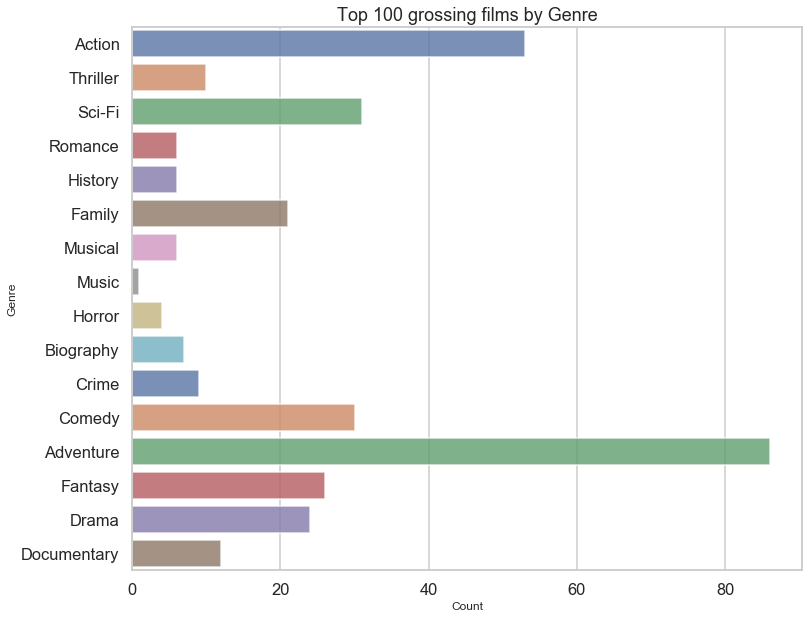

In [98]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12,10))
sns.barplot(y = keys, x = values, alpha=0.8, palette="deep")
plt.title('Top 100 grossing films by Genre')
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

### Genre Insight
It would appear that the most common genres among the top 100 grossing films are Adventure and Action. This corresponds with the hypothesis we made earlier when reviewing the first dataset we read in the Reading in DataFrames section. This is a very interesting find. 

When viewing the top ten films by worldwide gross, domain knowledge informs that all ten can be considered to belong to one or both of these groups. Many of those top films incorporate superhero characters with intense and action packed story lines. This may be an insight into what the contemporary movie goer is interested in.

Lets look for other patterns among the top 100 grossing films.

## Production Budget Trends

It would be quite valuable to know what pattern lies in how much money was spent making the most successful films in the industry. Lets explore trends associated with the production budget of the top 100 films to learn how much it costs to make a top grossing film. We can start in a similar fashion to our genre exploration, by grouping the top 100 grossing films by production budget.

In [99]:
df_prod_100 = df_movies.sort_values(
    ['production_budget', 'worldwide_gross'], ascending=[False, False])[:100]
df_prod_100.head(25)

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
movie,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,Horror
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi"
Spectre,2015-11-06,300000000,200074175,879620923,2015,148.0,"Action,Adventure,Thriller"
Justice League,2017-11-17,300000000,229024295,655945209,2017,120.0,"Action,Adventure,Fantasy"
The Dark Knight Rises,2012-07-20,275000000,448139099,1084439099,2012,164.0,"Action,Thriller"
Solo: A Star Wars Story,2018-05-25,275000000,213767512,393151347,2018,135.0,"Action,Adventure,Fantasy"


Lets take a quick glance at the distribution of production budgets by worldwide gross in a scatterplot.

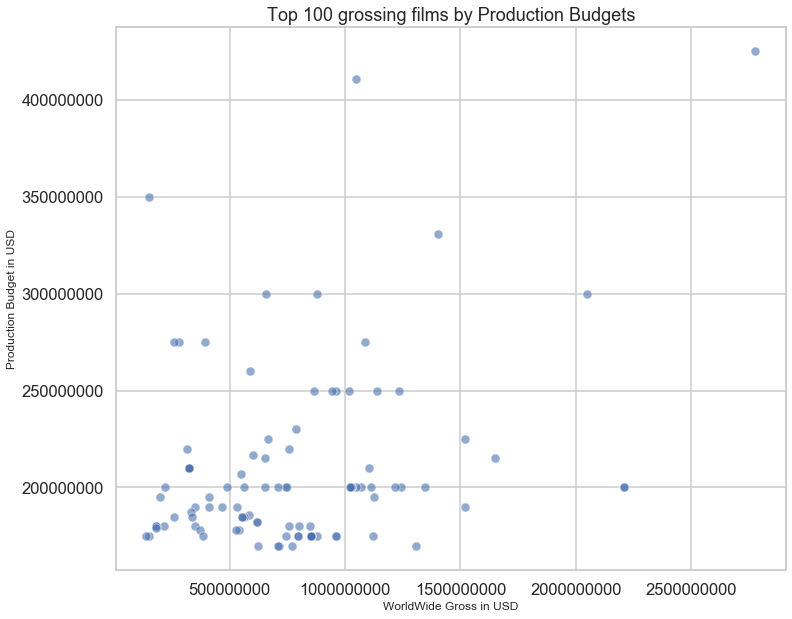

In [146]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_prod_100['worldwide_gross'],
                y=df_prod_100['production_budget'], alpha=0.6, palette='blues')
plt.title('Top 100 grossing films by Production Budgets')
plt.ylabel('Production Budget in USD', fontsize=12)
plt.xlabel('WorldWide Gross in USD', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Upon first glance we can see that there is some clustering within the range of production budgets near the lower range of the top 100 grossing films, with most lying in the range up to 200 million. Lets further explore this to find more insights

In [101]:
# Lets get the min and max of the production values to make bins that can group these numeric
# values for visualization. I will apply a scientific notation suppression to make it
# easier to understand the values.
df_prod_100['production_budget'].describe().apply(lambda x: format(x, 'f'))

count          100.000000
mean     209207000.000000
std       47491422.415319
min      170000000.000000
25%      179750000.000000
50%      200000000.000000
75%      215000000.000000
max      425000000.000000
Name: production_budget, dtype: object

Here we can see that the lowest budget for a top 100 grossing film is 170 million dollars, with the highest amount being 425 million dollars. With this knowledge we can make a column of appropriate bin size to show the most common range of production budget among the top 100 grossing films.

In [102]:
bins = [170000000, 221000000, 272000000, 323000000, 374000000, np.inf]
names = ['$170-$221 million', '$221-$272 million',
         '$272-$323 million', '$323-$374 million', '$374-$425 million']

df_prod_100['budget_range'] = pd.cut(
    df_prod_100['production_budget'], bins, labels=names)

print(df_prod_100.dtypes)

release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
start_year                    int64
runtime_minutes             float64
genres                       object
budget_range               category
dtype: object


In [103]:
df_prod_100.head()

,release_date,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,budget_range
movie,,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2011,93.0,Horror,$374-$425 million
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,136.0,"Action,Adventure,Fantasy",$374-$425 million
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi",$323-$374 million
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi",$323-$374 million
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi",$272-$323 million


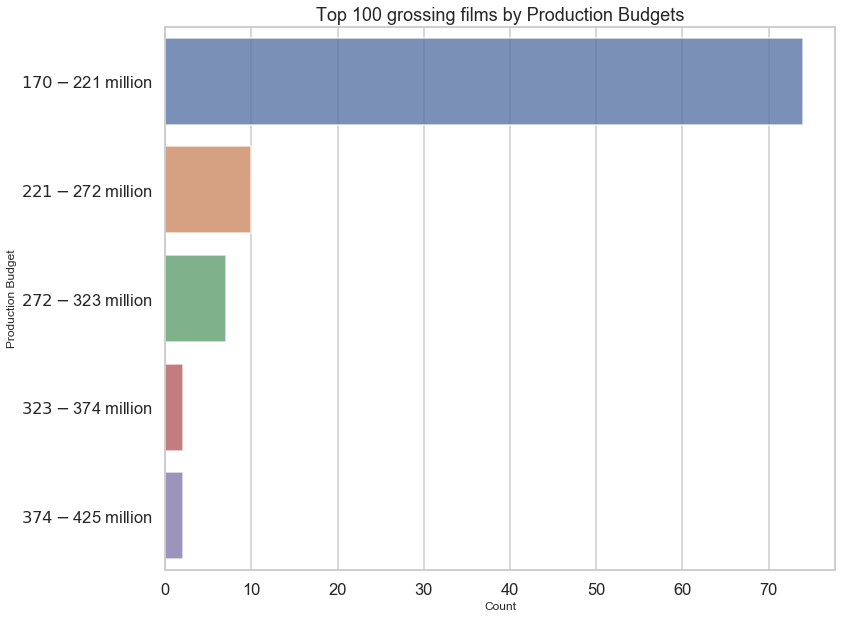

In [104]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.barplot(y=names, x=df_prod_100['budget_range'].value_counts(
), alpha=0.8, palette="deep")
plt.title('Top 100 grossing films by Production Budgets')
plt.ylabel('Production Budget', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

It may prove valuable to assess the Action and Adventure genres by their production budget to see what the typical cost of making the most common genre of film is, and if it differs from the general cost of the other genres. We can compare using boxplots.

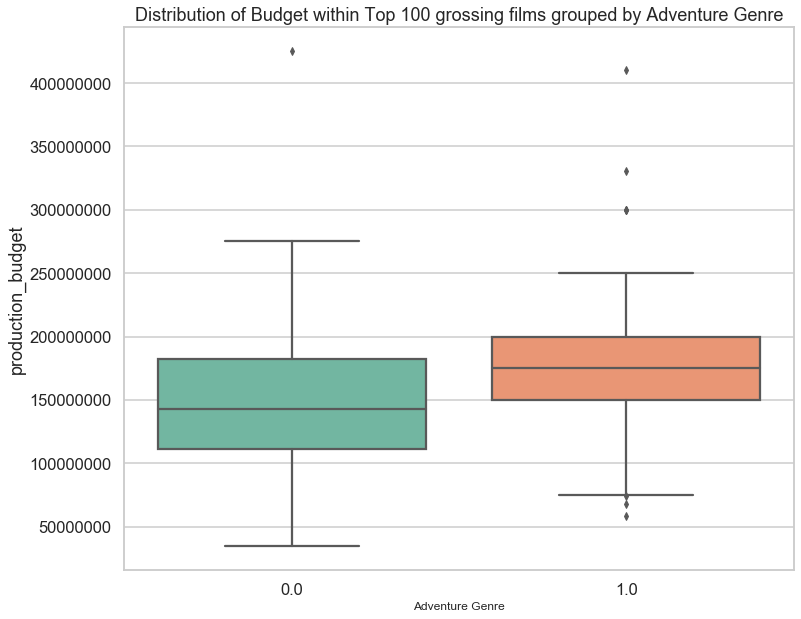

In [134]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_movies_mod['Adventure'], y=df_movies_mod['production_budget'], palette="Set2")
plt.title('Distribution of Budget within Top 100 grossing films grouped by Adventure Genre')
plt.xlabel('Adventure Genre', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

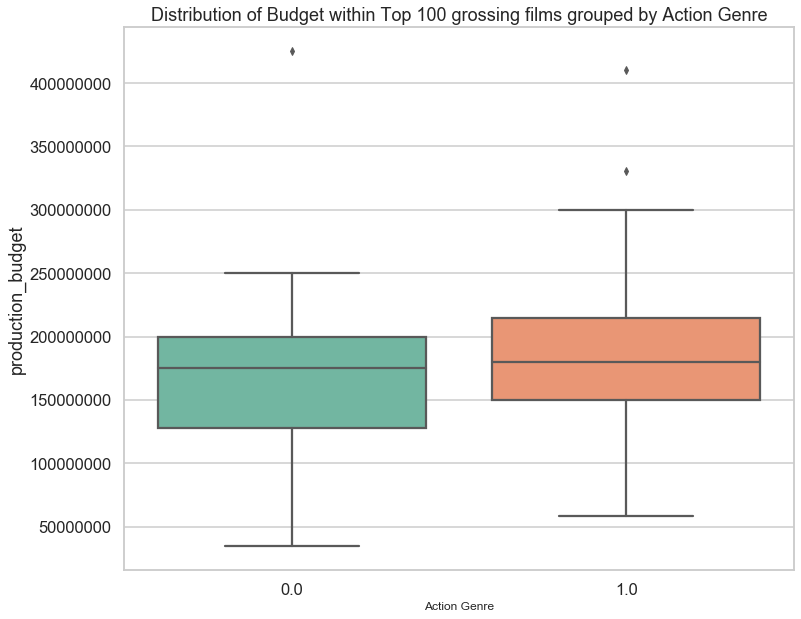

In [133]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_movies_mod['Action'], y=df_movies_mod['production_budget'], palette="Set2")
plt.title('Distribution of Budget within Top 100 grossing films grouped by Action Genre')
plt.xlabel('Action Genre', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Very interesting. While on average, Action films would appear to cost around 50 million more dollars to make, the Adventure genre has a more specific range than the other genres. This would be helpful information if the studio intends to make Action or Adventure films.

It could also prove worthwhile to take a look at the features of films based on correlation of production budget. To do this from a wide view, we can use a pairplot with a hue set to production budgets like so.

<Figure size 1080x1080 with 0 Axes>

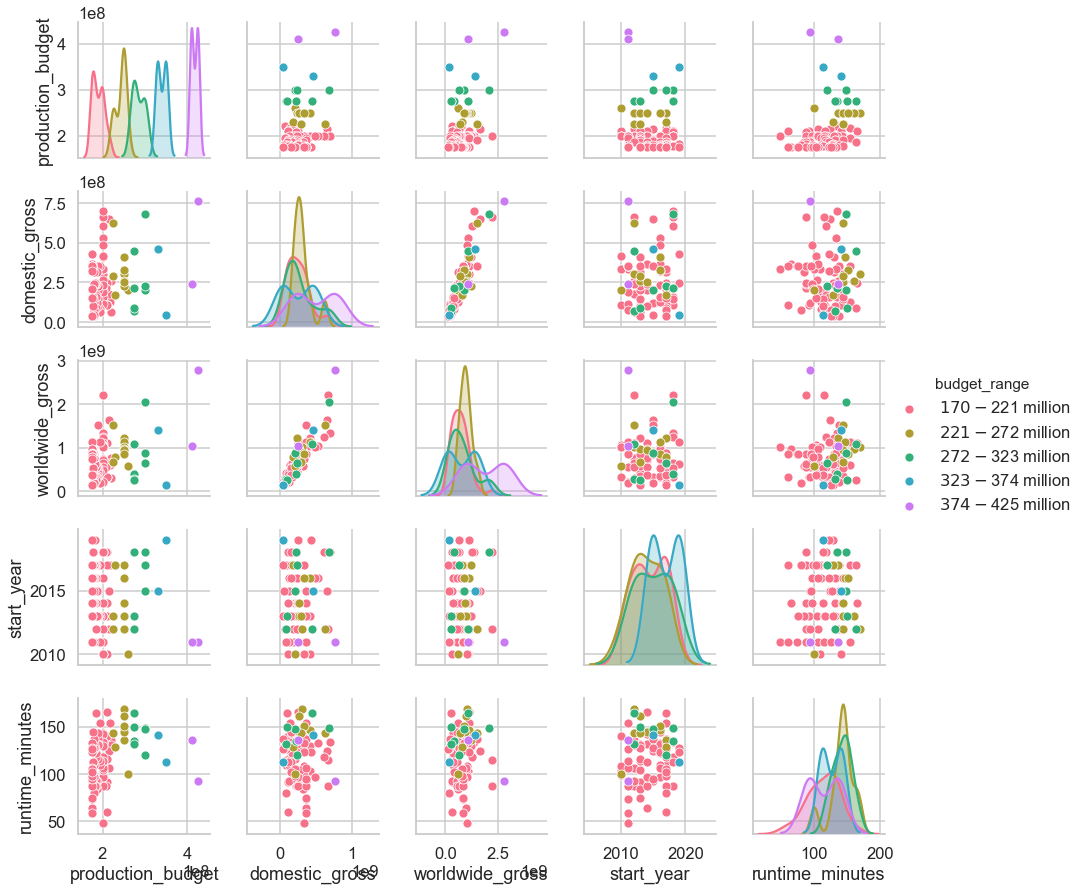

<Figure size 1080x1080 with 0 Axes>

In [119]:
sns.pairplot(df_prod_100, hue='budget_range', palette="husl", diag_kind="kde")
plt.figure(figsize=(15,15))

### Production Budget Insight

This bar plot shows us that around 75 of the top 100 grossing films had a production budget between 170 to 221 million dollars. This is valuable information. If the goal for Microsoft is to make a film that ranks among the top 100 highest grossing films worldwide, it would be safe to inform them that a healthy budget for their project should be within this range. 

Our pairplot also illustrates that there is a trend of most top 100 films having a production budget within the 170-221 million dollars range, but also shows with more detail the correlation between budget and gross, generally speaking the higher the budget, the higher the expected gross. There does appear to be a correlation between runtime minutes and production budget as well, the lower the production budget, the lower the length of the film. Lets follow this and look deeper in to the runtime trends.

## Runtime Trends

Now that we have an idea of what genres and production budgets have a high correlation to the top 100 highest grossing films, lets take a look at the patterns pertaining to the length of a film. Do films that last longer have a tendency to return a higher gross? In order to answer this question, lets take a look at the data.

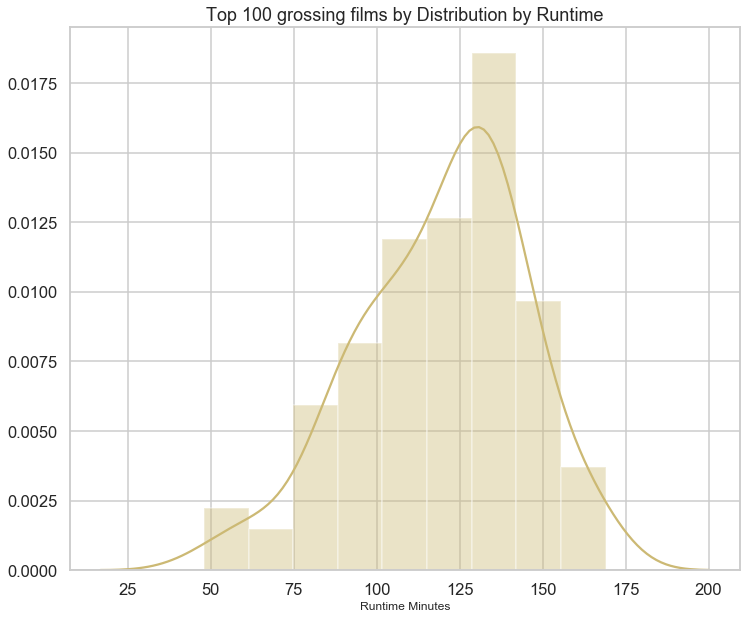

In [105]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.distplot(df_prod_100['runtime_minutes'], color="y")
plt.title('Top 100 grossing films by Distribution by Runtime')
plt.xlabel('Runtime Minutes', fontsize=12)
plt.show()

It would appear on first glance that a majority of the films within the top 100 gross have a runtime between 100 and 150 minutes, or in other words 1.67 hours and 2.5 hours. Lets take a deeper look into the runtime trends to discover what the most common runtime is among the highest grossing films.

In [106]:
df_prod_100['runtime_minutes'].describe().apply(lambda x: format(x, 'f'))

count    100.000000
mean     119.440000
std       25.112402
min       48.000000
25%      102.750000
50%      124.000000
75%      136.000000
max      169.000000
Name: runtime_minutes, dtype: object

Here the describe method shows us that the minimum runtime within the top 100 grossing group is 48 minutes, and the maximum is 169 minutes. It would appear that a boxplot could be useful in showing us with a little more clarity what a reasonable runtime should be if we want our film in the top 100 grossing category. Lets use a similar method as in the budget case, and make evenly spaced bins of runtime minutes to describe the distribution. First we will need to make the bins.

In [107]:
mins = [48, 72, 96, 120, 144, np.inf]
groups = ['48-72 min', '72-96 min',
         '96-120 min', '120-144 min', '144-169 min']

df_prod_100['length_minutes'] = pd.cut(
    df_prod_100['runtime_minutes'], mins, labels=groups)

print(df_prod_100.dtypes)

release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
start_year                    int64
runtime_minutes             float64
genres                       object
budget_range               category
length_minutes             category
dtype: object


Now that we have a new feature that groups the length of a film into categories, we can make a boxplot of these categories with seaborn.

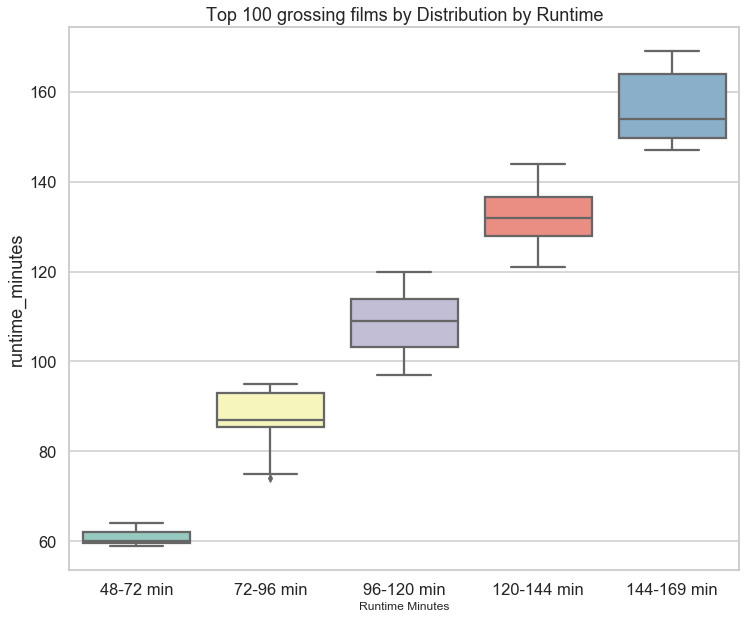

In [128]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_prod_100['length_minutes'], y=df_prod_100['runtime_minutes'], palette="Set3")
plt.title('Top 100 grossing films by Distribution by Runtime')
plt.xlabel('Runtime Minutes', fontsize=12)
plt.show()

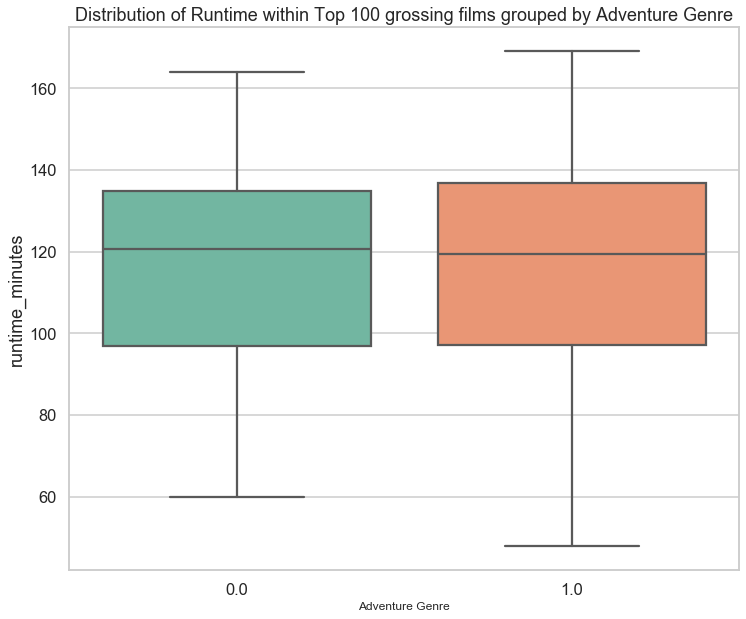

In [135]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_movies_mod['Adventure'], y=df_movies_mod['runtime_minutes'], palette="Set2")
plt.title('Distribution of Runtime within Top 100 grossing films grouped by Adventure Genre')
plt.xlabel('Adventure Genre', fontsize=12)
plt.show()

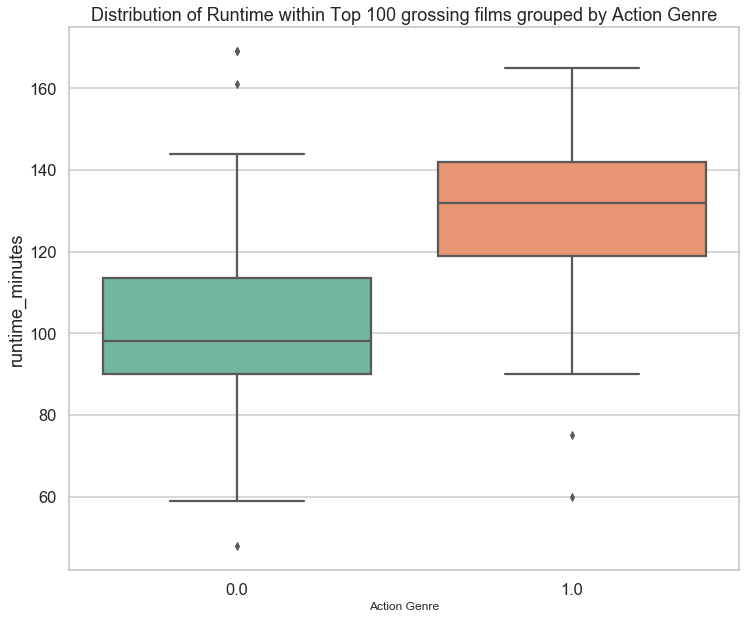

In [136]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_movies_mod['Action'], y=df_movies_mod['runtime_minutes'], palette="Set2")
plt.title('Distribution of Runtime within Top 100 grossing films grouped by Action Genre')
plt.xlabel('Action Genre', fontsize=12)
plt.show()

Lets take a closer look at the relationship between runtime minutes and production budget. We can use a countplot to see the correlation.

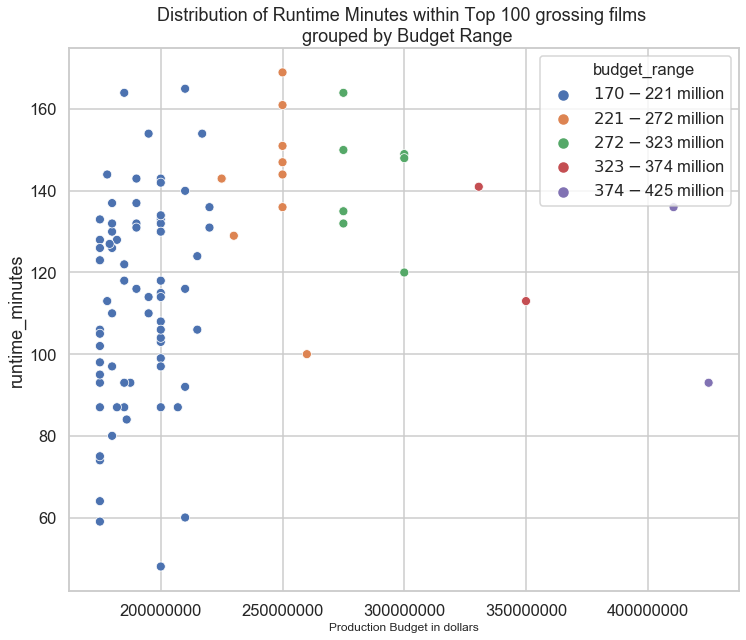

In [145]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_prod_100['production_budget'], y=df_prod_100['runtime_minutes'], hue=df_prod_100['budget_range'])
plt.title('Distribution of Runtime Minutes within Top 100 grossing films \n grouped by Budget Range')
plt.xlabel('Production Budget in dollars', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We can see a clear seperation 

### Runtime Insights

We can see through the data visualizations that the average runtime for a film in the top 100 grossing group is around 120 minutes, in other words 2 hours. This seems to be consistent with my own movie going experience. What is very interesting to note is the trend seen among the most popular genres. While Adventure movies seemed to have a similar distribution of runtime with other genres, Action movies seem to have a slightly higher average, of around 130 minutes. This could prove useful for Microsoft if they choose the route of making an Action film!

## Q.1 Conclusion

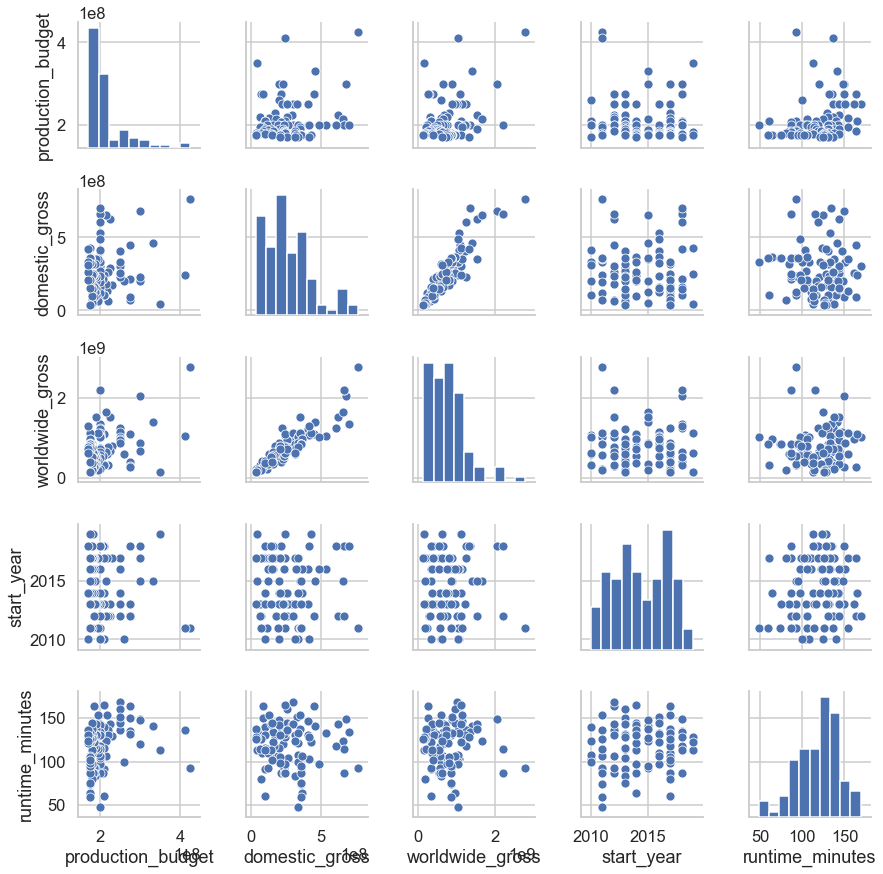

In [143]:
sns.pairplot(df_prod_100)

Upon inspection, and exploratory data analysis there would appear to be trends among the top 100 worldwide grossing films. The data shows that:

  - **Action** and **Adventure** films are among the most popular genre of films among the top grossing around the world.
  - A reasonable budget for production for a film expected to be in the top 100 grossing is between **170-221 million dollars**, with Action films costing **50 million dollars** more to make on average.
  - A favorable runtime for a film belonging to the top 100 grossing worldwide is around **120 minutes**, with Action movies having an average **30 minute** longer length.

# Q.2 Is there a correlation between Franchise Films and 100 highest grossing films? 

![title](img/franchises.png)

When taking a look at the list of top 100 grossing films, there seems to be a pattern not just among the genre, or budget, but also about the content. Many of these films are a part of a series, or have origins that are within the same fictional source. Lets explore the relationship between those films that are a part of a franchise and the highest grossing films.

### Definitions

Lets define some of the film vernacular we will use in this section.

 - Film Franchise: a collection of related films in succession that share the same fictional universe, or are marketed as a series. Film series will be used interchangeably with Film franchise.
 - Trilogy: a group of three related films.

## Franchise Trends

In order to take a look at the trends among franchise films, we will need a dataset that informs us as to what films belong to a franchise, and the gross of these films and franchises. While we do not have this dataset on hand, it is readily available on various websites. We will need to scrape one such site for this data. A great library for web scraping is beautiful soup. Lets use web scraping to retrieve a dataframe with the relevant information to answer question 2.

First we will need to import BeautifulSoup, which is a Python library for pulling data out of HTML and XML files.

We will also need to import requests. Requests is a library which allows one to use HTTP with python in a semi readable format.

In [152]:
from bs4 import BeautifulSoup
import requests

With these imports we can now reference the website url that holds the data we are looking for. I was able to find the relevant data on the-numbers.com, which looks like this:

![title](img/grossing_franchises.PNG)

In [169]:
# Lets save this url locally and use pandas to read the html into python
table = pd.read_html(
    'file:///C:/Users/morga/Desktop/Desktop/A%20I/Flatiron/Module%201/Project/Movie%20Franchises%20-%20Box%20Office%20History%20-%20The%20Numbers.html')

In [170]:
table

[          Year Marvel Cinematic Universe       Star Wars      James Bond  \
 0   Year: 1960                        $0              $0              $0   
 1   Year: 1961                        $0              $0              $0   
 2   Year: 1962                        $0              $0              $0   
 3   Year: 1963                        $0              $0    $172,200,809   
 4   Year: 1964                        $0              $0    $915,694,346   
 ..         ...                       ...             ...             ...   
 56  Year: 2016            $4,773,883,318  $6,573,710,718  $5,931,136,027   
 57  Year: 2017            $5,827,853,955  $7,207,864,195  $5,931,136,027   
 58  Year: 2018            $7,427,210,882  $7,524,594,721  $5,931,136,027   
 59  Year: 2019            $9,102,945,806  $7,976,176,977  $5,931,136,027   
 60  Year: 2020            $9,102,945,806  $8,035,697,261  $5,931,136,027   
 
             Batman    Harry Potter  
 0               $0              $0 

In [171]:
type(table)

list

In [172]:
len(table)

2

In [173]:
table[0]

,Year,Marvel Cinematic Universe,Star Wars,James Bond,Batman,Harry Potter
0,Year: 1960,$0,$0,$0,$0,$0
1,Year: 1961,$0,$0,$0,$0,$0
2,Year: 1962,$0,$0,$0,$0,$0
3,Year: 1963,$0,$0,"$172,200,809",$0,$0
4,Year: 1964,$0,$0,"$915,694,346",$0,$0
...,...,...,...,...,...,...
56,Year: 2016,"$4,773,883,318","$6,573,710,718","$5,931,136,027","$3,434,806,595","$3,467,608,875"
57,Year: 2017,"$5,827,853,955","$7,207,864,195","$5,931,136,027","$3,613,300,018","$3,479,148,211"
58,Year: 2018,"$7,427,210,882","$7,524,594,721","$5,931,136,027","$3,614,279,982","$3,637,471,798"
59,Year: 2019,"$9,102,945,806","$7,976,176,977","$5,931,136,027","$3,948,265,436","$3,640,245,840"


In [174]:
table[1]

,Franchise,No. of Movies,Domestic Box Office,Infl. Adj. Dom. Box Office,Worldwide Box Office,First Year,Last Year,No. of Years
0,Marvel Cinematic Universe,30,"$8,545,426,433","$9,102,945,801","$22,590,455,007",2008,2022,14.0
1,Star Wars,15,"$5,075,019,577","$8,035,697,253","$10,310,160,586",1977,2026,49.0
2,James Bond,27,"$2,136,666,623","$5,931,136,027","$7,119,674,009",1963,2020,57.0
3,Batman,22,"$2,786,557,399","$3,948,280,777","$6,049,944,480",1989,2021,32.0
4,Harry Potter,12,"$2,786,938,291","$3,638,704,111","$9,185,046,972",2001,2021,20.0
...,...,...,...,...,...,...,...,...
848,Tales From Sanctuary City,1,$0,$0,$0,2020,2020,NaN
849,Greenstreet Hooligans,1,$0,$0,$0,2015,2015,NaN
850,Blind Dead,1,$0,$0,$0,1977,1977,NaN
851,Ironclad,1,$0,$0,"$5,297,411",2011,2011,NaN


In [167]:
table_df = tables[1]
type(table_df)

pandas.core.frame.DataFrame

In [161]:
# Reference the url of the website for python
URL = 'https://www.the-numbers.com/movies/franchises'
movie_data = requests.get(URL)
soup = BeautifulSoup(movie_data, 'html.parser')

TypeError: object of type 'Response' has no len()

In [159]:
table = soup.find('table', {'class':'display compact dataTable no-footer'})
type(table)

NoneType